In [1]:
from velocity import get
from velocity.velocity_data import particle_type
from velocity.velocity_data import dm_mass
from velocity.velocity_data import find_circ_vel
from velocity.velocity_data import star_pos_vel
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
r,vel_circ = find_circ_vel()

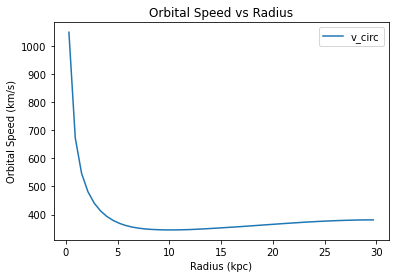

In [3]:
plt.plot(r,vel_circ, label = "v_circ")

plt.legend()

plt.xlabel("Radius (kpc)")
plt.ylabel("Orbital Speed (km/s)")
plt.title("Orbital Speed vs Radius")
plt.savefig("OrbitalVel_tot.png",dpi=200)

plt.show()

In [ ]:
pos,vel_raw,star_masses = star_pos_vel()

Galaxy Angular Momentum

In [ ]:
radius = np.sqrt(pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)
stars_select = np.where(radius < 30)[0]
vel = np.array((vel_raw[stars_select, 0], vel_raw[stars_select, 1], vel_raw[stars_select, 2])).T
rad = np.array((pos[stars_select, 0], pos[stars_select, 1], pos[stars_select, 2])).T
mass = np.array((star_masses[stars_select],star_masses[stars_select],star_masses[stars_select])).T
print(np.shape(mass),mass)

In [ ]:
J_raw = mass*(np.cross(rad,vel))

J = np.sum(J_raw,axis=0)

print(J)

J_mag = np.dot(J,J)

print(J_mag)

In [ ]:
#still needs to be reworked into array format


Vertical Unit Vector

In [ ]:
n_j = J/J_mag

print(n_j)

2d Radius and Radial Unit Vector

In [ ]:
r_2d_sub = np.dot(rad,n_j.T)
rad_test = rad.T
#print(r_2d_sub,np.shape(r_2d_sub), rad_test[0],np.shape(rad_test[0]))
r_2d = np.array((rad_test[0] - r_2d_sub,rad_test[1] - r_2d_sub,rad_test[2] - r_2d_sub))
#print(r_2d)

r_2d_mag = np.dot(r_2d,r_2d)

print(r_2d_mag,r_2d.T)
n_r = np.array((r_2d[0]/r_2d_mag,r_2d[1]/r_2d_mag,r_2d[2]/r_2d_mag))

Rotational Unit Vector

In [ ]:
n_phi = np.cross(n_j,n_r)

Galaxy Reference Frame Velocities

In [ ]:
#v_phi = np.dot(vel,n_phi)
#v_r = np.dot(vel,n_r)
v_j = np.dot(vel,n_j)

In [ ]:
v_final = np.dot(vel,vel) - v_r**2 - v_j**2


In [ ]:
#scipy interpolate the vel_circ
from scipy import interpolate

f = interpolate.interp1d(r, vel_circ)

new_v_circ = f(rad)
print(np.shape(new_v_circ))
print(len(r),len(rad))

Epsilon

In [ ]:
e_v = J[2]/(r*vel_circ)

print(J,(r*vel_circ))

e_v_final, y = np.histogram(e_v)

y_final = (y[1:]+y[:-1])/2


plt.plot(e_v_final, y_final, label = "epsilon")

plt.legend()

plt.show()

Radial Velocity

In [ ]:
import requests
from scipy import stats
import h5py
import numpy as np
from velocity import get



vr,rr,num = stats.binned_statistic(r_new,v_final,statistic='sum',bins=np.linspace(0,30,50))
        
r_final = (rr[1:]+rr[:-1])/2
#plt.plot(r,vel_circ, label = "v_circ")
plt.plot(r_final[30:],vr[30:], label = "v_r")

plt.legend()

plt.xlabel("Radius (kpc)")
plt.ylabel("Orbital Speed (km/s)")
plt.title("Orbital Speed vs Radius")
#plt.savefig("OrbitalVel_tot.png",dpi=200)

plt.show()